## Group Activity -Car Rental Demand Forecast

* Amal Joseph
* Ajithra SS
* Daina Maria Johnson
* Riya George

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv('train_E1GspfA.csv')
df.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [39]:
df.duplicated().sum()

0

In [40]:
df.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [41]:
df.shape

(18247, 3)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


### Decompose Data Features

In [43]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']=df['date'].dt.year

In [44]:
df['hour_bin']= pd.cut(df['hour'],5,labels = ['EarlyMorn', 'Morn', 'Noon','Eve' ,'Night'] )
#pd.cut(df['hour'],5)

In [45]:
df['week_of_year']=(df['date'].dt.isocalendar().week).astype(int)
df['day_of_week']=df['date'].dt.dayofweek
df['quartor']=df['date'].dt.quarter


In [46]:
# Defining a function to idetify the TimeofDay 

def timeOfDay(n):
    if n in range(1,4):
        return 1   #'Late Night'
    elif n in range(4,7):
        return 2 # 'Early Morning'
    elif n in range(7,12):
        return 3 #'Morning'
    elif n in range(12,15):
        return 4 #'Afternoon'
    elif n in range(15,18):
        return 5 #'Evening'
    elif n in range(18,25)or n==0:
        return 6 #"Night"
# Applying the function to "Hour" column
df['timeOfDay'] = df['hour'].apply(lambda n: timeOfDay(n))

In [47]:
# Defining a function to identify the season 

def season(n):
    if n in [1,12]:
        return 'Winter'
    elif n in [2,3]:
        return 'Spring'
    elif n in [4,5,6]:
        return 'Summer'
    elif n in [7,8,9]:
        return 'Monsoon'
    elif n in [10,11]:
        return 'Autumn'
# Applying the function to 'Month' column
df['Season']=df['month'].apply(lambda x:season(x))    

In [48]:
 df['dayOfYear'] = df['date'].dt.dayofyear
# Add a holiday column to the dataset
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df.date.min(), end=df.date.max())

df['Holiday'] = df['date'].isin(holidays)
df['Holiday'] = df['Holiday'].astype(int)
df

,date,hour,demand,day,month,year,hour_bin,week_of_year,day_of_week,quartor,timeOfDay,Season,dayOfYear,Holiday
0,2018-08-18,9,91,18,8,2018,Morn,33,5,3,3,Monsoon,230,0
1,2018-08-18,10,21,18,8,2018,Noon,33,5,3,3,Monsoon,230,0
2,2018-08-18,13,23,18,8,2018,Noon,33,5,3,4,Monsoon,230,0
3,2018-08-18,14,104,18,8,2018,Eve,33,5,3,4,Monsoon,230,0
4,2018-08-18,15,81,18,8,2018,Eve,33,5,3,5,Monsoon,230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,Night,8,6,1,6,Spring,59,0
18243,2021-02-28,20,88,28,2,2021,Night,8,6,1,6,Spring,59,0
18244,2021-02-28,21,39,28,2,2021,Night,8,6,1,6,Spring,59,0
18245,2021-02-28,22,104,28,2,2021,Night,8,6,1,6,Spring,59,0


<AxesSubplot:xlabel='year', ylabel='demand'>

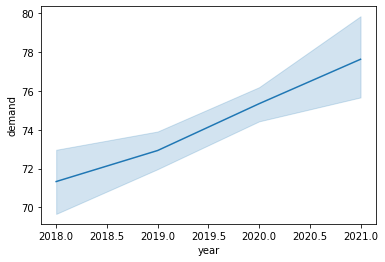

In [14]:
sns.lineplot(data = df, x ='year', y = 'demand')


Demand has been increasing over the years.

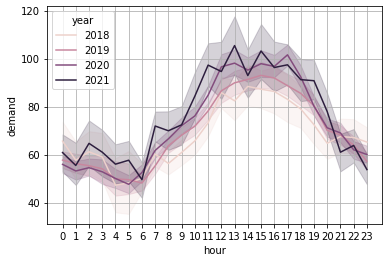

In [15]:
sns.lineplot(data = df,x = 'hour', hue ='year', y = 'demand')
plt.xticks(np.arange(0,24))
plt.grid()
plt.show()

Over all years, demand is very low till 5, then increases and peaks from 11 to 19 and slowly decreases.

<AxesSubplot:xlabel='timeOfDay', ylabel='demand'>

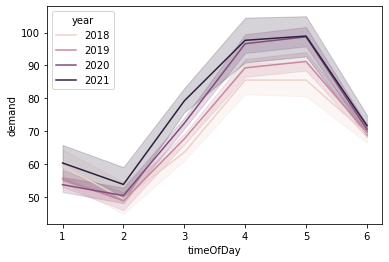

In [16]:
sns.lineplot(data = df, x = 'timeOfDay' , y ='demand',hue ='year')

<AxesSubplot:xlabel='hour_bin', ylabel='demand'>

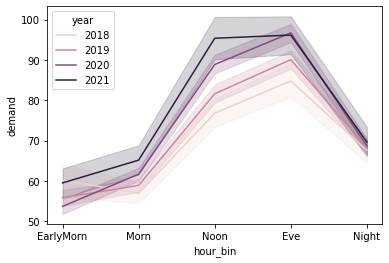

In [17]:
sns.lineplot(data = df, x = 'hour_bin' , y ='demand',hue ='year')

<AxesSubplot:xlabel='Season', ylabel='demand'>

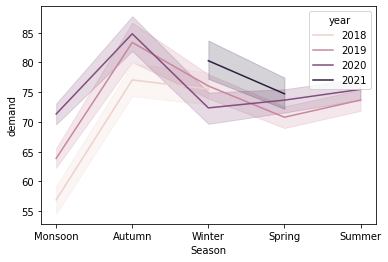

In [18]:
sns.lineplot(data = df, x = 'Season' , y ='demand',hue= 'year')

In [19]:
df

,date,hour,demand,day,month,year,hour_bin,week_of_year,day_of_week,quartor,timeOfDay,Season,dayOfYear,Holiday
0,2018-08-18,9,91,18,8,2018,Morn,33,5,3,3,Monsoon,230,0
1,2018-08-18,10,21,18,8,2018,Noon,33,5,3,3,Monsoon,230,0
2,2018-08-18,13,23,18,8,2018,Noon,33,5,3,4,Monsoon,230,0
3,2018-08-18,14,104,18,8,2018,Eve,33,5,3,4,Monsoon,230,0
4,2018-08-18,15,81,18,8,2018,Eve,33,5,3,5,Monsoon,230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,28,2,2021,Night,8,6,1,6,Spring,59,0
18243,2021-02-28,20,88,28,2,2021,Night,8,6,1,6,Spring,59,0
18244,2021-02-28,21,39,28,2,2021,Night,8,6,1,6,Spring,59,0
18245,2021-02-28,22,104,28,2,2021,Night,8,6,1,6,Spring,59,0


<AxesSubplot:xlabel='month', ylabel='demand'>

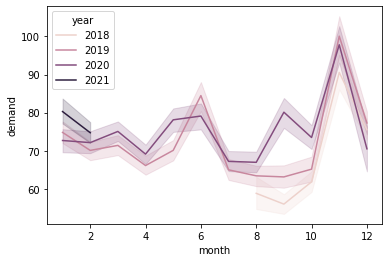

In [20]:
sns.lineplot(data = df, x ='month',hue ='year', y = 'demand')

Peak demand seems to be in month 11.

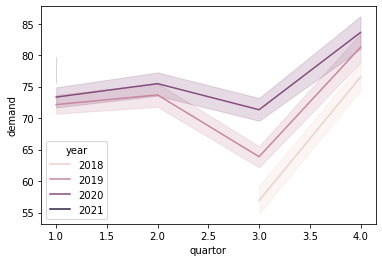

In [21]:
sns.lineplot(data = df, x ='quartor', y = 'demand',hue ='year')
#plt.xticks([1,2,3,4])
plt.show()

Demand  is high in third quarter.

<AxesSubplot:xlabel='dayOfYear', ylabel='demand'>

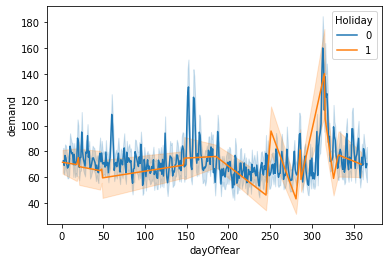

In [22]:
sns.lineplot(data = df, x ='dayOfYear', y = 'demand',hue = 'Holiday')

<AxesSubplot:xlabel='day', ylabel='demand'>

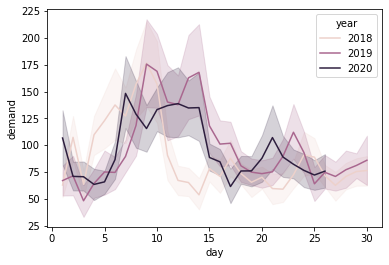

In [23]:
df_nov = df[df['month'] == 11]
sns.lineplot(data = df_nov, x ='day', y = 'demand',hue ='year')

Peak falls in Nov 5 to 15 for all years.

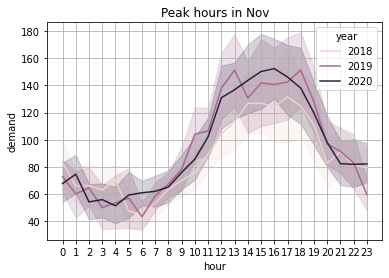

In [24]:
sns.lineplot(data = df_nov,x = 'hour', hue ='year', y = 'demand')
plt.xticks(np.arange(0,24))
plt.grid()
plt.title("Peak hours in Nov")
plt.show()

During the peak month, peak hours are slightly different. Peak hours are from 12 to 19.

In [49]:
dfraw = df.copy()

## Encode

In [26]:
df.dtypes

date            datetime64[ns]
hour                     int64
demand                   int64
day                      int64
month                    int64
year                     int64
hour_bin              category
week_of_year             int32
day_of_week              int64
quartor                  int64
timeOfDay                int64
Season                  object
dayOfYear                int64
Holiday                  int32
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df ['Season'] = le.fit_transform(df[['Season']])
df['hour_bin'] = le.fit_transform(df[['hour_bin']])

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Cyclic Normalize

In [51]:
df.columns

Index(['date', 'hour', 'demand', 'day', 'month', 'year', 'hour_bin',
       'week_of_year', 'day_of_week', 'quartor', 'timeOfDay', 'Season',
       'dayOfYear', 'Holiday'],
      dtype='object')

In [52]:
df['hour-sin'] = np.sin(df['hour']*np.pi/24)
df['hour-cos'] = np.cos(df['hour']*np.pi/24)
df.drop('hour', axis =1, inplace =True)

df['dayOfYear-sin'] = np.sin(df['dayOfYear']*np.pi/365)
df['dayOfYear-cos'] = np.cos(df['dayOfYear']*np.pi/365)
df.drop('dayOfYear', axis =1, inplace =True)

df['day-sin'] = np.sin(df['day']*np.pi/31)
df['day-cos'] = np.cos(df['day']*np.pi/31)
df.drop('day', axis =1, inplace =True)

df['month-sin'] = np.sin(df['month']*np.pi/12)
df['month-cos'] = np.cos(df['month']*np.pi/12)
df.drop('month', axis =1, inplace =True)

df['week_of_year-sin'] = np.sin(df['week_of_year']*np.pi/53)
df['week_of_year-cos'] = np.cos(df['week_of_year']*np.pi/53)
df.drop('week_of_year', axis =1, inplace =True)

df['day_of_week-sin'] = np.sin(df['day_of_week']*np.pi/7)
df['day_of_week-cos'] = np.cos(df['day_of_week']*np.pi/7)
df.drop('day_of_week', axis =1, inplace =True)

In [53]:
df['hour_bin']= df['hour_bin'] +1
df['hour_bin'].value_counts()

2    4441
4    4213
3    3571
5    3544
1    2478
Name: hour_bin, dtype: int64

In [54]:
df['quartor-sin'] = np.sin(df['quartor']*np.pi/3)
df['quartor-cos'] = np.cos(df['quartor']*np.pi/3)
df.drop('quartor', axis =1, inplace =True)

df['hour_bin-sin'] = np.sin(df['hour_bin']*np.pi/5)
df['hour_bin-cos'] = np.cos(df['hour_bin']*np.pi/5)
df.drop('hour_bin', axis =1, inplace =True)

df['timeOfDay-sin'] = np.sin(df['timeOfDay']*np.pi/6)
df['timeOfDay-cos'] = np.cos(df['timeOfDay']*np.pi/6)
df.drop('timeOfDay', axis =1, inplace =True)

df['Season-sin'] = np.sin(df['Season']*np.pi/5)
df['Season-cos'] = np.cos(df['Season']*np.pi/5)
df.drop('Season', axis =1, inplace =True)


In [55]:
dfclean = df.copy()

## Train Test Split

In [56]:
df.drop('date',axis =1, inplace = True)
ind21 = dfraw[dfraw['year']== 2021].index
ind20 = dfraw[(dfraw['year']== 2019) & (dfraw['month']>6)].index



In [57]:
def split(dataframe):
    train = dataframe.drop(ind21)
    train = dataframe.drop(ind20)

    test1 = dataframe.loc[ind21]
    test2 = dataframe.loc[ind20]
    test = pd.concat([test1,test2])

    X_test = test.drop('demand', axis =1)
    y_test = test['demand']
    X_train = train.drop('demand', axis =1)
    y_train = train['demand']
    return(X_train,X_test,y_train,y_test)

In [59]:
X_train,X_test,y_train,y_test = split(df)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF')

,feature,VIF
1,Holiday,1.105776
13,day_of_week-cos,1.267140
17,hour_bin-cos,3.126860
21,Season-cos,3.326522
7,day-cos,4.932646
12,day_of_week-sin,5.600933
6,day-sin,5.753963
19,timeOfDay-cos,6.472567
3,hour-cos,6.474779
16,hour_bin-sin,7.671161


In [61]:
vif_data.sort_values(by = 'VIF').feature.values


array(['Holiday', 'day_of_week-cos', 'hour_bin-cos', 'Season-cos',
       'day-cos', 'day_of_week-sin', 'day-sin', 'timeOfDay-cos',
       'hour-cos', 'hour_bin-sin', 'quartor-cos', 'week_of_year-cos',
       'Season-sin', 'timeOfDay-sin', 'hour-sin', 'year', 'quartor-sin',
       'month-sin', 'month-cos', 'dayOfYear-cos', 'week_of_year-sin',
       'dayOfYear-sin'], dtype=object)

In [62]:
high = ['quartor-sin','month-cos', 'dayOfYear-cos', 'week_of_year-sin',
       'dayOfYear-sin' , 'hour-cos' ,'timeOfDay-sin', 'Season-sin']

<AxesSubplot:>

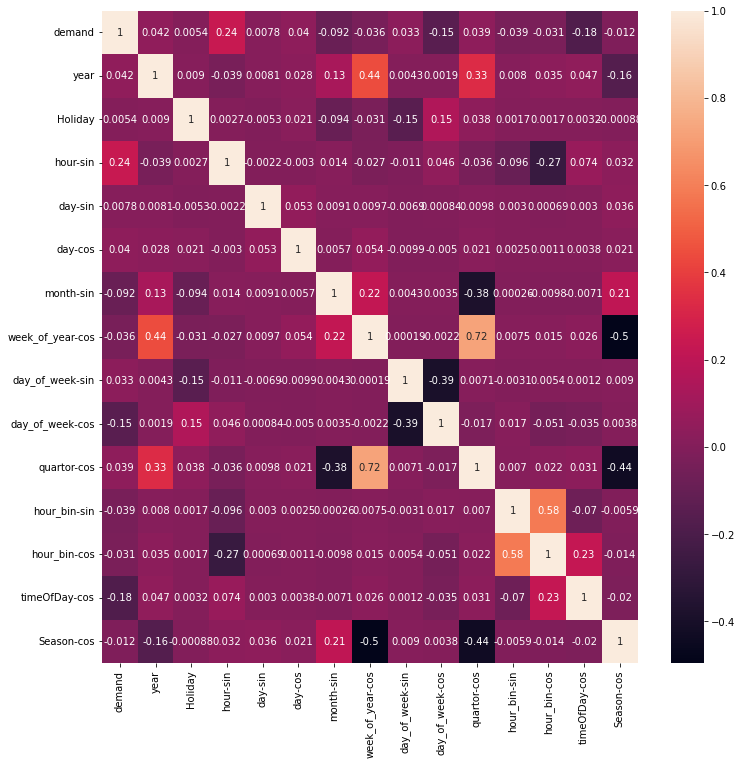

In [63]:
plt.figure(figsize = (12,12))
sns.heatmap(df.drop(high,axis =1).corr(),annot=True)

In [65]:
vif_data.sort_values(by = 'VIF').feature.values

array(['Holiday', 'day_of_week-cos', 'hour_bin-cos', 'Season-cos',
       'day-cos', 'day_of_week-sin', 'day-sin', 'timeOfDay-cos',
       'hour-cos', 'hour_bin-sin', 'quartor-cos', 'week_of_year-cos',
       'Season-sin', 'timeOfDay-sin', 'hour-sin', 'year', 'quartor-sin',
       'month-sin', 'month-cos', 'dayOfYear-cos', 'week_of_year-sin',
       'dayOfYear-sin'], dtype=object)

In [66]:
high

['quartor-sin',
 'month-cos',
 'dayOfYear-cos',
 'week_of_year-sin',
 'dayOfYear-sin',
 'hour-cos',
 'timeOfDay-sin',
 'Season-sin']

In [207]:
#Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.
#select = ['Holiday', 'hour_bin-sin', 'quartor-sin', 'day_of_week-sin','timeOfDay-sin', 'day-sin', 'hour-sin', 'year', 'month-sin']
drop = high

In [67]:
df_V = df.drop(high,axis =1)
df_V

,demand,year,Holiday,hour-sin,day-sin,day-cos,month-sin,week_of_year-cos,day_of_week-sin,day_of_week-cos,quartor-cos,hour_bin-sin,hour_bin-cos,timeOfDay-cos,Season-cos
0,91,2018,0,0.923880,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,-0.309017,6.123234e-17,0.809017
1,21,2018,0,0.965926,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,1.224647e-16,-1.000000,6.123234e-17,0.809017
2,23,2018,0,0.991445,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,1.224647e-16,-1.000000,-5.000000e-01,0.809017
3,104,2018,0,0.965926,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,0.309017,-5.000000e-01,0.809017
4,81,2018,0,0.923880,0.968077,-0.250653,0.866025,-0.375828,0.781831,-0.623490,-1.0,9.510565e-01,0.309017,-8.660254e-01,0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,95,2021,0,0.608761,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18243,88,2021,0,0.500000,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18244,39,2021,0,0.382683,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017
18245,104,2021,0,0.258819,0.299363,-0.954139,0.500000,0.889657,0.433884,-0.900969,0.5,5.877853e-01,-0.809017,-1.000000e+00,0.309017


## Model to predict demand 

In [68]:
X_train,X_test,y_train,y_test = split(df_V)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.2084892997530502

In [70]:
ypred = lr.predict(X_test)

In [71]:
mean_squared_error(ypred,y_test)

1529.8824809442553

In [72]:
r2_score(y_test,ypred)

0.2084892997530502

## Using all features

In [73]:
X_train,X_test,y_train,y_test = split(df)


In [74]:
lr.fit(X_test,y_test)

LinearRegression()

In [75]:
#lrsel=lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.2405077989941138

In [76]:
ypred = lr.predict(X_test)
mean_squared_error(ypred,y_test)

1467.9950787401574

## Gradient Boost Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
X_train,X_test,y_train,y_test = split(df_V)
gb.fit(X_test,y_test)
gb.score(X_test,y_test)

0.42458341049269166

In [79]:
ypred = gb.predict(X_test)
mean_squared_error(ypred,y_test)

1112.2019692939905

Gradient boost is giving a better model